In [18]:
from statistics import mean , median
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


def mean_func(points):
    return mean([p[0] for p in points]), mean([p[1] for p in points])


def median_func(points):
    return median([p[0] for p in points]), median([p[1] for p in points])


# manhattan-distance
def distance_func(p1, p2):
    '''
    :param p1: point 1
    :param p2: point 2
    :return: manhattan-distance
    '''
    return abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])


def K_means_family(datapoints, K, centroid_method, initialization_method, max_iterations):
    '''
    :param datapoints:
    :param K:
    :param centroid_method: Means or Median
    :param initialization_method: Random Split Initialization or Random Seed Selection Method
    if the parameter is None, use Random Split Initialization
    else use what passed in as Random Seed
    :param max_iterations: max number of iterations to run the algorithm.
    :return:
    '''

    points = datapoints.tolist()

    if centroid_method == "Means":
        centroid_func = mean_func
    elif centroid_method == "Median":
        centroid_func = median_func

    if initialization_method is None:
        random.shuffle(points)
    else: #use what passed in as Random Seed
        random.Random(initialization_method).shuffle(points)

    n = len(points)

    def rearrange(rule):
        clusters = []
        for _ in range(K):
            clusters.append([])

        for j in range(n):
            if rule[j][1] == -1:
                clusters[j % K].append(points[j])
            else:
                clusters[rule[j][1]].append(points[j])
        return clusters

    # use a list [[min distance, cluster id]] to record which cluster should each point goes to
    arrange_rule = []  # at first there is no clusters
    for _ in range(n):
        arrange_rule.append([float("inf"), -1])
    clusters = points.copy()

    iter_counts = 0
    while iter_counts <  max_iterations:
        # rearrange clusters according to rules
        new_clusters = rearrange(arrange_rule)
        if new_clusters == clusters:
            break
        iter_counts += 1

        clusters = new_clusters

        for i in range(K):
            # calculate center
            if (len(clusters[i]) > 0):
                c_i = centroid_func(clusters[i])
                # calculate the distance that each point to this center
                for j in range(n):
                    dis = distance_func(points[j], c_i)
                    # update rule if seeing smaller distance to other clusters
                    if dis < arrange_rule[j][0]:
                        arrange_rule[j][0] = dis
                        arrange_rule[j][1] = i
    return [sorted(c) for c in clusters]




In [19]:
def Silhouette(list_of_clusters):
    def simple_score_func(ax, bx):
        return (bx - ax) / max(ax, bx)

    clusters = list_of_clusters
    print("num of clusters: ", len(clusters))

    sum_score = 0
    # for each point x
    for i in range(len(clusters)):
        print("num of points in clusters: ", len(clusters[i]))
        for j in range(len(clusters[i])):
            # now cluster[i][j] is x
            # a(x): average distance within a cluster
            if len(clusters[i]) > 1:
                a_x = mean([distance_func(clusters[i][j], clusters[i][t]) for t in range(len(clusters[i])) if t != j])
            else:
                a_x = 0
            # b(x): min distance to other clusters
            bx_candidates = []
            for k in range(len(clusters)):
                if k != i:  # other clusters
                    if len(clusters[k]) > 1:
                        bx_candidates.append(
                            mean([distance_func(clusters[i][j], clusters[k][t])
                                  for t in range(len(clusters[k]))]))

            b_x= min(bx_candidates)
            sum_score += simple_score_func(a_x, b_x)
    return sum_score


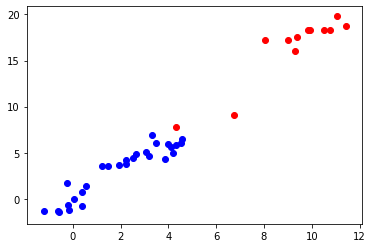

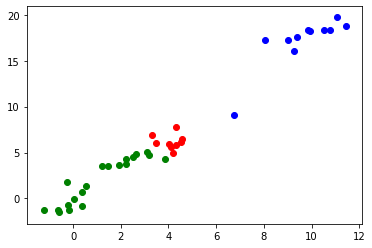

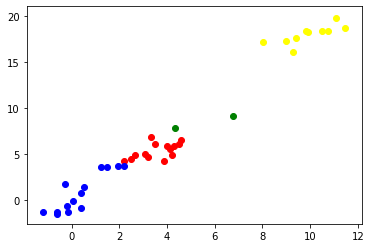

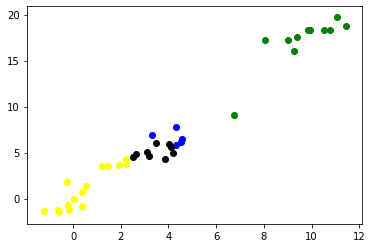

num of clusters:  2
num of points in clusters:  12
num of points in clusters:  28
num of clusters:  3
num of points in clusters:  9
num of points in clusters:  11
num of points in clusters:  20
num of clusters:  4
num of points in clusters:  14
num of points in clusters:  14
num of points in clusters:  2
num of points in clusters:  10
num of clusters:  5
num of points in clusters:  0
num of points in clusters:  5
num of points in clusters:  11
num of points in clusters:  15
num of points in clusters:  9
silhouette score using k = 2:  27.970714200587132
silhouette score using k = 3:  18.7055055463709
silhouette score using k = 4:  22.45801210324862
silhouette score using k = 5:  16.30372560827377
Best silhouette score:  27.970714200587132
Best K is:  2


In [20]:
data = pd.read_csv("hw4_data1.csv")
#!!! None means Random Split Initialization. If you pass in an integer, it will be used as random seed
clst1 = K_means_family(data.to_numpy(), K=2, centroid_method="Means", initialization_method=None, max_iterations=100)
plt.scatter([item[0] for item in clst1[0]], [item[1] for item in clst1[0]], color="red")
plt.scatter([item[0] for item in clst1[1]], [item[1] for item in clst1[1]], color="blue")
plt.show()

clst2 = K_means_family(data.to_numpy(), K=3, centroid_method="Means", initialization_method=None, max_iterations=100)
plt.scatter([item[0] for item in clst2[0]], [item[1] for item in clst2[0]], color="red")
plt.scatter([item[0] for item in clst2[1]], [item[1] for item in clst2[1]], color="blue")
plt.scatter([item[0] for item in clst2[2]], [item[1] for item in clst2[2]], color="green")
plt.show()

clst3 = K_means_family(data.to_numpy(), K=4, centroid_method="Means", initialization_method=None, max_iterations=100)
plt.scatter([item[0] for item in clst3[0]], [item[1] for item in clst3[0]], color="red")
plt.scatter([item[0] for item in clst3[1]], [item[1] for item in clst3[1]], color="blue")
plt.scatter([item[0] for item in clst3[2]], [item[1] for item in clst3[2]], color="green")
plt.scatter([item[0] for item in clst3[3]], [item[1] for item in clst3[3]], color="yellow")
plt.show()

clst4 = K_means_family(data.to_numpy(), K=5, centroid_method="Means", initialization_method=None, max_iterations=100)
plt.scatter([item[0] for item in clst4[0]], [item[1] for item in clst4[0]], color="red")
plt.scatter([item[0] for item in clst4[1]], [item[1] for item in clst4[1]], color="blue")
plt.scatter([item[0] for item in clst4[2]], [item[1] for item in clst4[2]], color="green")
plt.scatter([item[0] for item in clst4[3]], [item[1] for item in clst4[3]], color="yellow")
plt.scatter([item[0] for item in clst4[4]], [item[1] for item in clst4[4]], color="black")
plt.show()

score1 = Silhouette(clst1)
score2 = Silhouette(clst2)
score3 = Silhouette(clst3)
score4 = Silhouette(clst4)

print("silhouette score using k = 2: ", score1)
print("silhouette score using k = 3: ", score2)
print("silhouette score using k = 4: ", score3)
print("silhouette score using k = 5: ", score4)

print("Best silhouette score: ", max([score1, score2, score3, score4]))
idx = np.argmax([score1, score2, score3, score4])
print("Best K is: ", idx + 2)

## BONUS！

In [21]:
def distance_between_clusters(c1, c2, func_type):
    if len(c1) == 0 or len(c2) == 0:
        return None 
    distances = []
    for pc1 in c1:
        for pc2 in c2:
            distances.append(distance_func(pc1, pc2))
    if func_type == "MIN":
        return min(distances)
    elif func_type == "MAX":
        return min(distances)
    elif func_type == "AVG":
        return sum(distances) / len(distances)
    else:
        return None


def cal_diameters(clusters):
    diameters = []
    for c in clusters:
        if len(c) <= 1:
            diameters.append(0)
        else:
            distances = []
            for i in range(len(c)):
                for j in range(i + 1, len(c)):
                    distances.append(distance_func(c[i], c[j]))
            diameters.append(max(distances))
                    
    return diameters

# MIN, MAX, AVG
def HAC (datapoints, distance_function):
    cluster_history = []
    diameters = []
    
    clusters = [[point] for point in datapoints.tolist()]
    cluster_history.append(clusters)
    diameters.append(cal_diameters(clusters))
    
    # merge the closet two sets until there is only one cluster
    while(len(clusters) > 1):
        distances = {}
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distances[distance_between_clusters(clusters[i], clusters[j], distance_function)] = (i, j)
                
        shortest = min(distances.keys())
        # merge
        pick_c1_idx = distances[shortest][0]
        pick_c2_idx = distances[shortest][1]
        c1 = clusters[pick_c1_idx]
        c2 = clusters[pick_c2_idx]
        clusters = [clusters[k] for k in range(len(clusters)) if k != pick_c1_idx and k != pick_c2_idx] + [(c1 + c2)]
        cluster_history.append(clusters.copy())
        diameters.append(cal_diameters(clusters))
        
    return cluster_history, diameters

In [22]:
# test it
cluster_history, diameters = HAC(data.to_numpy(), "AVG")
# Save the output of the algorithm to two files, one containing the clusters and the other the diameters.
with open("cluster_history.txt", "w") as f:
    for line in cluster_history:
        print(line, file=f) 
        
with open("diameters.txt", "w") as f:
    for line in diameters:
        print(line, file=f)
        